14. Пусть \( x_n \) и \( y_m \) — независимые случайные выборки из нормального распределения с параметрами
$$
a,\ \sigma_x^2 = 2 \quad \text{и} \quad b,\ \sigma_y^2 = 1
$$
соответственно. Используя реализации случайных выборок:
\[ x = \{-1.11, -6.10, 2.42\}, \quad y = \{-2.29, -2.91\}, \]
проверить гипотезу о равенстве средних против альтернативы \( a > b \). Построить график мощности критерия.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math

In [ ]:
# Данные
alpha = 0.05
data_A = np.array([-1.11, -6.10, 2.42])  # Выборка A
data_B = np.array([-2.29, -2.91])        # Выборка B

n_A = len(data_A)
n_B = len(data_B)

var_A = 2
var_B = 1

In [ ]:
# Расчёт
mean_diff = data_A.mean() - data_B.mean()
std_error = math.sqrt(var_A / n_A + var_B / n_B)
z_stat = mean_diff / std_error

p_val = norm.sf(z_stat)

print(f"Среднее A: {data_A.mean():.3f}, Среднее B: {data_B.mean():.3f}")
print(f"Z-статистика: {z_stat:.4f}")
print(f"P-value: {p_val:.4f}")

Среднее A: -1.597, Среднее B: -2.600
Z-статистика: 0.9289
P-value: 0.1765


График мощности критерия

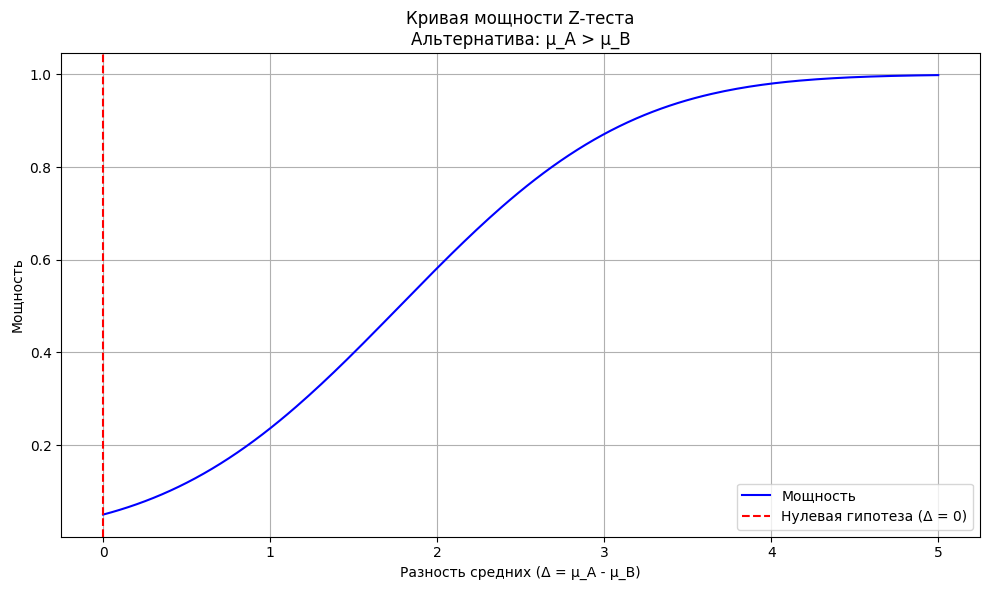

In [ ]:
diff_mean = np.linspace(0, 5, 200)
z_crit = norm.ppf(1 - alpha)

# Расчёт мощности
se = std_error
power_curve = 1 - norm.cdf(z_crit - diff_mean / se)

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(diff_mean, power_curve, label='Мощность', color='blue')
plt.axvline(x=0, linestyle='--', color='red', label='Нулевая гипотеза (Δ = 0)')
plt.title('Кривая мощности Z-теста\nАльтернатива: μ_A > μ_B')
plt.xlabel('Разность средних (Δ = μ_A - μ_B)')
plt.ylabel('Мощность')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()